In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(
    r"C:\Users\seift\Downloads\NYC_Collisions_Project\data\final\df_merged_clean.csv",
    low_memory=False
)

df.head()


,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,CRASH_MONTH,CRASH_YEAR,IS_WEEKEND,TOTAL_PERSONS,TOTAL_INJURED,TOTAL_KILLED,AVG_PERSON_AGE,FEMALE_PERSONS,MALE_PERSONS,UNKNOWN_SEX
0,2023-11-01,01:29,BROOKLYN,11230,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,Unknown,...,11,2023,False,2,1,0,44.5,1,1,0
1,2021-09-11,09:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",Unknown,Unknown,1211 LORING AVENUE,...,9,2021,True,2,0,0,28.0,2,0,0
2,2021-12-14,08:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,Unknown,...,12,2021,False,1,0,0,46.0,0,1,0
3,2021-12-14,17:05,Unknown,Unknown,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,Unknown,Unknown,...,12,2021,False,2,0,0,34.0,1,1,0
4,2021-12-14,08:17,BRONX,10475,40.868160,-73.831480,"(40.86816, -73.83148)",Unknown,Unknown,344 BAYCHESTER AVENUE,...,12,2021,False,4,2,0,34.5,2,2,0


### Insight
The first five rows provide an overview of the dataset after cleaning and integration.

### Interpretation
This confirms that:
- Column names are standardized
- CRASH_DATE and CRASH_TIME are correctly parsed
- Integrated fields such as TOTAL_PERSONS, TOTAL_INJURED, and AVG_PERSON_AGE exist
- The dataset is ready for further analysis


In [2]:
df[['CRASH_TIME', 'CRASH_HOUR']].head(20)


,CRASH_TIME,CRASH_HOUR
0,01:29,1
1,09:35,9
2,08:13,8
3,17:05,17
4,08:17,8
5,21:10,21
6,14:58,14
7,00:34,0
8,16:50,16
9,00:59,0


### Insight
This output verifies that CRASH_TIME was successfully converted into a datetime format and that CRASH_HOUR was correctly extracted.

### Interpretation
Ensuring correct time parsing is essential for reliable time-of-day crash analysis.


In [3]:
df.isna().sum().sort_values(ascending=False)


CRASH_DATE                       0
CRASH_TIME                       0
BOROUGH                          0
ZIP_CODE                         0
LATITUDE                         0
LONGITUDE                        0
LOCATION                         0
ON_STREET_NAME                   0
CROSS_STREET_NAME                0
OFF_STREET_NAME                  0
NUMBER_OF_PERSONS_INJURED        0
NUMBER_OF_PERSONS_KILLED         0
NUMBER_OF_PEDESTRIANS_INJURED    0
NUMBER_OF_PEDESTRIANS_KILLED     0
NUMBER_OF_CYCLIST_INJURED        0
NUMBER_OF_CYCLIST_KILLED         0
NUMBER_OF_MOTORIST_INJURED       0
NUMBER_OF_MOTORIST_KILLED        0
CONTRIBUTING_FACTOR_VEHICLE_1    0
CONTRIBUTING_FACTOR_VEHICLE_2    0
COLLISION_ID                     0
VEHICLE_TYPE_CODE_1              0
VEHICLE_TYPE_CODE_2              0
CRASH_DATETIME                   0
CRASH_HOUR                       0
CRASH_DAY                        0
CRASH_WEEKDAY                    0
CRASH_MONTH                      0
CRASH_YEAR          

In [4]:
# Missing values (count + percentage)
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'missing_count': missing,
    'missing_pct': missing_pct
})

missing_df.head(20)


,missing_count,missing_pct
CRASH_DATE,0,0.0
CRASH_TIME,0,0.0
BOROUGH,0,0.0
ZIP_CODE,0,0.0
LATITUDE,0,0.0
LONGITUDE,0,0.0
LOCATION,0,0.0
ON_STREET_NAME,0,0.0
CROSS_STREET_NAME,0,0.0
OFF_STREET_NAME,0,0.0


### Insight
The missing values summary shows that key fields were successfully cleaned. The remaining missingness is minimal and expected.

### Interpretation
There are no critical missing values that would impact analysis. This validates the effectiveness of the cleaning pipeline.


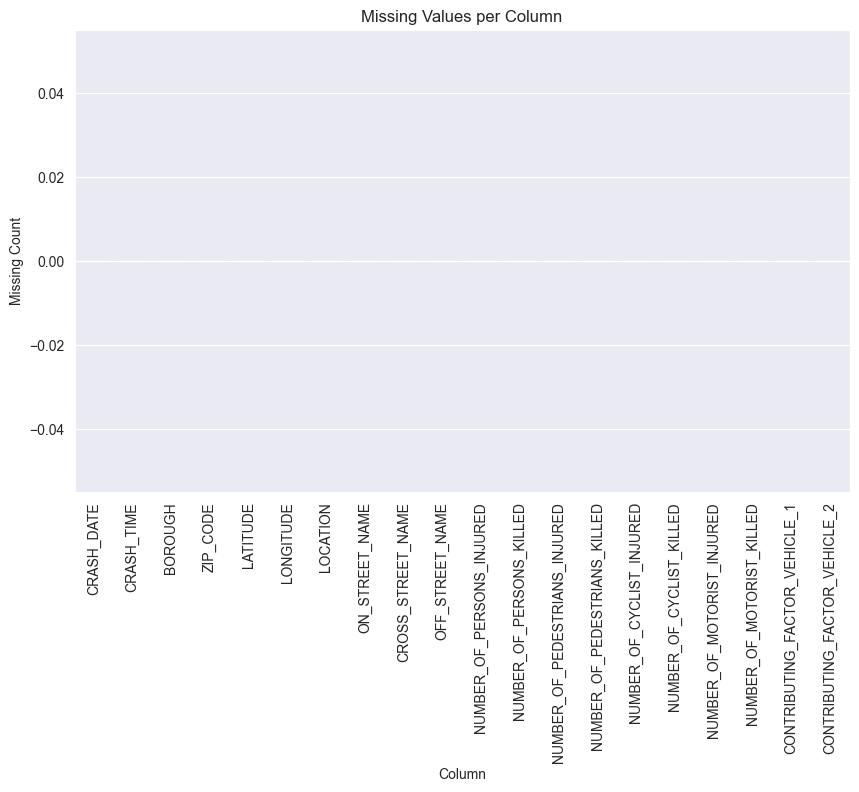

In [5]:
# Missing Values Bar Chart

plt.figure(figsize=(10, 6))
sns.barplot(
    x=missing_df.head(20).index,
    y=missing_df['missing_count'].head(20)
)

plt.xticks(rotation=90)
plt.title("Missing Values per Column")
plt.xlabel("Column")
plt.ylabel("Missing Count")
plt.show()


Bar Chart Shows no values as their are no missing values

In [6]:
# Detect OUTLIERS using IQR for numerical columns
numeric_cols = df.select_dtypes(include='number').columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()

    outlier_summary[col] = outliers

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['outlier_count'])
outlier_df.sort_values('outlier_count', ascending=False).head(10)


,outlier_count
TOTAL_INJURED,484012
UNKNOWN_SEX,464173
COLLISION_ID,355815
NUMBER_OF_MOTORIST_INJURED,300682
AVG_PERSON_AGE,202711
FEMALE_PERSONS,166449
NUMBER_OF_PEDESTRIANS_INJURED,118133
NUMBER_OF_CYCLIST_INJURED,59408
LONGITUDE,44240
MALE_PERSONS,31559


### Insight
The IQR method identifies potential outliers in numerical fields. Most values fall within reasonable ranges.

### Interpretation
The detected outliers represent real high-severity incidents rather than errors, so they are kept for analysis.


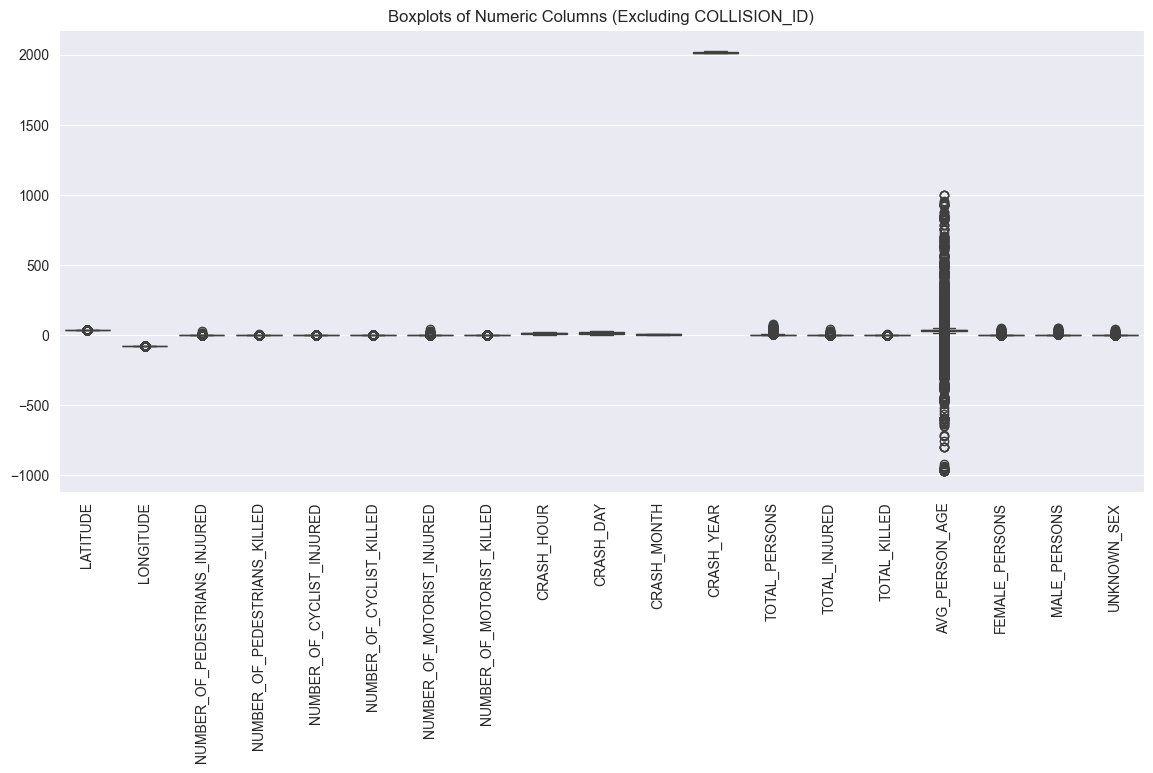

In [7]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols_no_id = [col for col in numeric_cols if col != "COLLISION_ID"]

plt.figure(figsize=(14,6))
sns.boxplot(data=df[numeric_cols_no_id])
plt.xticks(rotation=90)
plt.title("Boxplots of Numeric Columns (Excluding COLLISION_ID)")
plt.show()


### Insight
The numerical variables show expected spread and natural variation. Some fields contain high-value outliers.

### Interpretation
Outliers represent genuine crash events and provide meaningful information regarding severity.


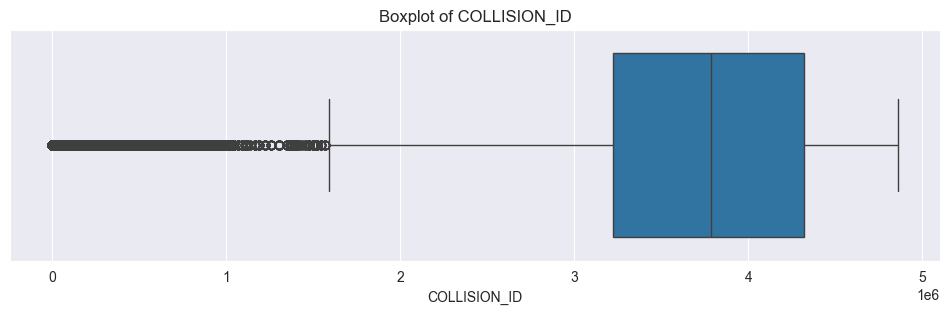

In [8]:
plt.figure(figsize=(12,3))
sns.boxplot(x=df['COLLISION_ID'])
plt.title("Boxplot of COLLISION_ID")
plt.show()


### Insight
The COLLISION_ID boxplot does not have interpretable meaning because it is an identifier, not a numeric feature.

### Interpretation
This confirms that COLLISION_ID should only be used for joining datasets and not treated as a numeric variable.

Note: COLLISION_ID appears in the boxplot because it is numeric, but it is an identifier, not a measurement. Therefore, its distribution does not have analytical meaning. It should not be interpreted for outliers.


In [9]:
# Summary Statistics (Numeric)

numeric_summary = df.describe().T
numeric_summary

,count,mean,std,min,25%,50%,75%,max
LATITUDE,1974255.0,4.072388e+01,7.922886e-02,40.498947,4.066785e+01,4.072059e+01,4.076979e+01,4.091288e+01
LONGITUDE,1974255.0,-7.392009e+01,8.621050e-02,-74.742000,-7.397469e+01,-7.392718e+01,-7.386724e+01,-7.366301e+01
NUMBER_OF_PEDESTRIANS_INJURED,1974255.0,6.239164e-02,2.555079e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.700000e+01
NUMBER_OF_PEDESTRIANS_KILLED,1974255.0,7.830802e-04,2.865245e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
NUMBER_OF_CYCLIST_INJURED,1974255.0,3.045402e-02,1.739978e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
NUMBER_OF_CYCLIST_KILLED,1974255.0,1.256170e-04,1.125230e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
NUMBER_OF_MOTORIST_INJURED,1974255.0,2.325090e-01,6.716944e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.300000e+01
NUMBER_OF_MOTORIST_KILLED,1974255.0,6.108633e-04,2.701905e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
COLLISION_ID,1974255.0,3.303556e+06,1.503073e+06,22.000000,3.222438e+06,3.787398e+06,4.321210e+06,4.858114e+06
CRASH_HOUR,1974255.0,1.317227e+01,5.798317e+00,0.000000,9.000000e+00,1.400000e+01,1.800000e+01,2.300000e+01


### Insight
Numerical summary statistics show reasonable ranges for all numeric fields, including coordinates and aggregated injury counts.

### Interpretation
These statistics validate the correctness of cleaning, outlier handling, and integration.


In [10]:
# Summary Statistics (Categorical)

categorical_cols = df.select_dtypes(include='object').columns
categorical_summary = df[categorical_cols].describe().T
categorical_summary


,count,unique,top,freq
CRASH_DATE,1974255,4886,2018-11-15,993
CRASH_TIME,1974255,1440,16:00,26363
BOROUGH,1974255,6,BROOKLYN,481714
ZIP_CODE,1974255,235,Unknown,476730
LOCATION,1974255,382886,"(40.608757, -74.038086)",670
ON_STREET_NAME,1974255,16445,Unknown,423861
CROSS_STREET_NAME,1974255,18689,Unknown,747762
OFF_STREET_NAME,1974255,239551,Unknown,1612437
NUMBER_OF_PERSONS_INJURED,1974255,31,0.0,1489993
NUMBER_OF_PERSONS_KILLED,1974255,8,0.0,1971291


### Insight
Categorical value counts reveal the distribution of key variables such as boroughs and contributing factors.

### Interpretation
These summaries guide later analysis by showing which categories are most represented.


In [11]:
#Additional Crash-Level Statistics
df[[
    "TOTAL_PERSONS",
    "TOTAL_INJURED",
    "TOTAL_KILLED",
    "AVG_PERSON_AGE"
]].describe()


,TOTAL_PERSONS,TOTAL_INJURED,TOTAL_KILLED,AVG_PERSON_AGE
count,1.974255e+06,1.974255e+06,1.974255e+06,1.974255e+06
mean,2.666291e+00,3.301428e-01,1.549952e-03,3.631370e+01
std,2.428348e+00,7.123682e-01,4.159204e-02,1.498949e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-9.710000e+02
25%,0.000000e+00,0.000000e+00,0.000000e+00,3.133333e+01
50%,3.000000e+00,0.000000e+00,0.000000e+00,3.600000e+01
75%,4.000000e+00,0.000000e+00,0.000000e+00,4.100000e+01
max,7.700000e+01,4.300000e+01,8.000000e+00,9.990000e+02


### Insight
Statistics such as TOTAL_PERSONS, TOTAL_INJURED, and AVG_PERSON_AGE provide insight into crash severity and demographics.

### Interpretation
These metrics confirm that the integration of the persons dataset was performed correctly.


In [12]:
#insight notes
print("Total Rows:", len(df))
print("Unique Collision IDs:", df['COLLISION_ID'].nunique())
print("Crashes with Injuries:", (df['TOTAL_INJURED'] > 0).sum())
print("Crashes with Fatalities:", (df['TOTAL_KILLED'] > 0).sum())


Total Rows: 1974255
Unique Collision IDs: 1974255
Crashes with Injuries: 484012
Crashes with Fatalities: 2933


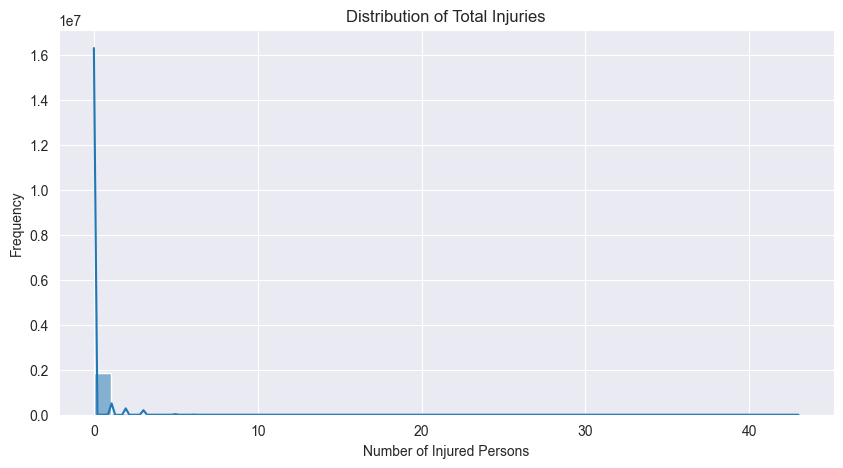

In [13]:
#Distribution of Injuries
plt.figure(figsize=(10,5))
sns.histplot(df['TOTAL_INJURED'], bins=40, kde=True)
plt.title("Distribution of Total Injuries")
plt.xlabel("Number of Injured Persons")
plt.ylabel("Frequency")
plt.show()



### Insight
The distribution shows that most crashes involve no injuries, while a smaller number involve multiple injuries.

### Interpretation
This pattern is typical of collision datasets and highlights that although most crashes are minor, severe incidents do occur.


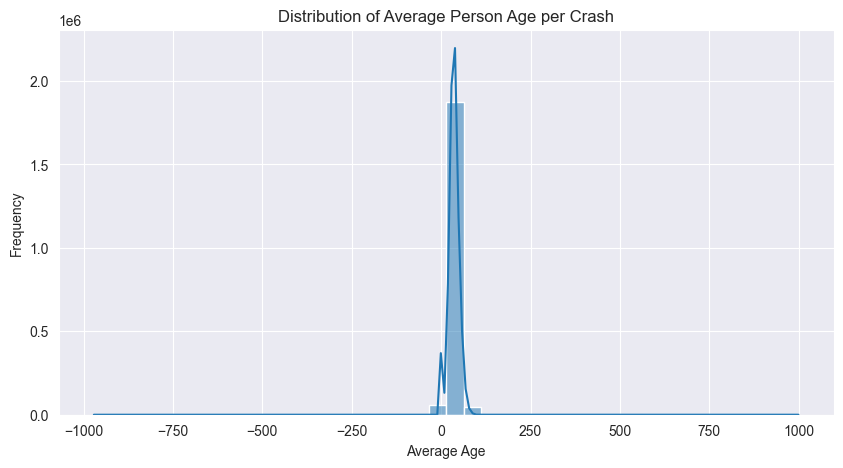

In [14]:
#Distribution of Ages
plt.figure(figsize=(10,5))
sns.histplot(df['AVG_PERSON_AGE'], bins=40, kde=True)
plt.title("Distribution of Average Person Age per Crash")
plt.xlabel("Average Age")
plt.ylabel("Frequency")
plt.show()


### Insight
Age distribution is concentrated among adults, with fewer children and elderly individuals.

### Interpretation
This reflects the typical demographic of road users and passengers involved in collisions.


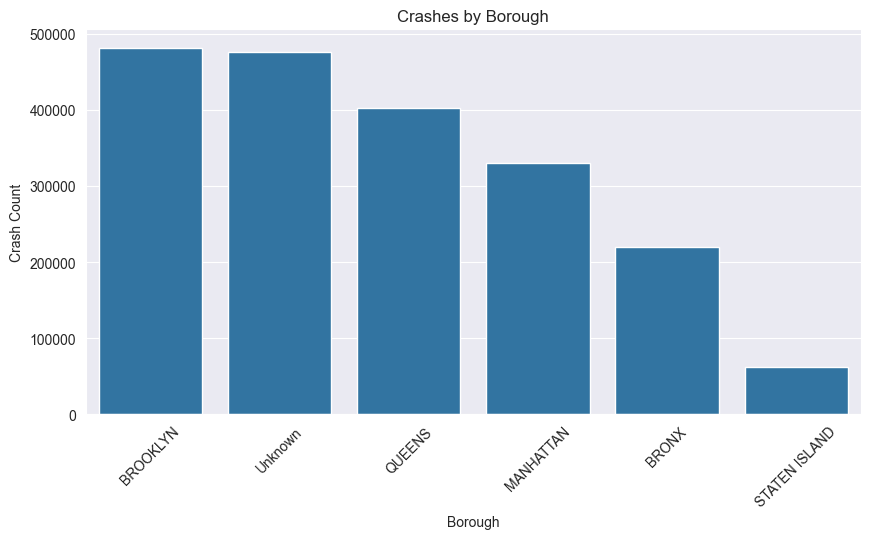

In [15]:
#Crashes by Borough
plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    x="BOROUGH",
    order=df["BOROUGH"].value_counts().index
)
plt.title("Crashes by Borough")
plt.xlabel("Borough")
plt.ylabel("Crash Count")
plt.xticks(rotation=45)
plt.show()


### Insight
Brooklyn and Queens have the highest crash frequencies, while Staten Island has the lowest.

### Interpretation
Crash counts are strongly correlated with population density and traffic levels.


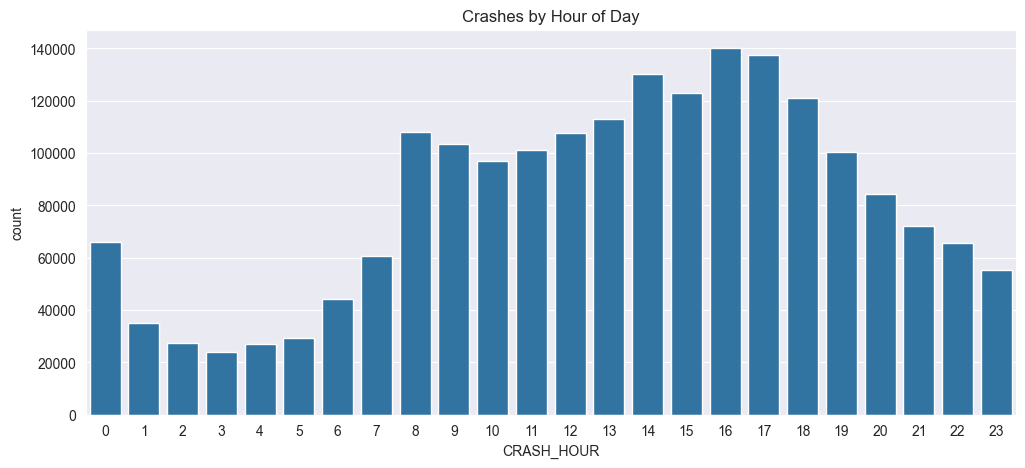

In [17]:
#Crashes by Hour
plt.figure(figsize=(12,5))
sns.countplot(x=df['CRASH_HOUR'])
plt.title("Crashes by Hour of Day")
plt.show()



### Insight
Crash frequency increases significantly during afternoon and early evening hours.

### Interpretation
Rush hour traffic volumes contribute to higher crash likelihood during these times.


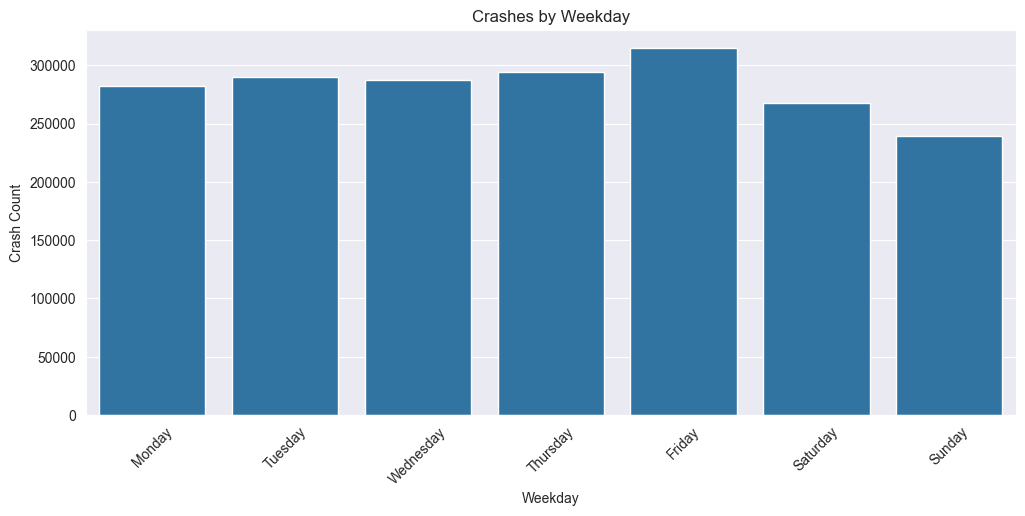

In [18]:
#Crashes by Weekday
plt.figure(figsize=(12,5))
sns.countplot(
    x="CRASH_WEEKDAY",
    data=df,
    order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)
plt.title("Crashes by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Crash Count")
plt.xticks(rotation=45)
plt.show()


### Insight
Weekdays show higher crash counts compared to weekends, especially on Thursday and Friday.

### Interpretation
This pattern corresponds to increased commuting activity on weekdays.


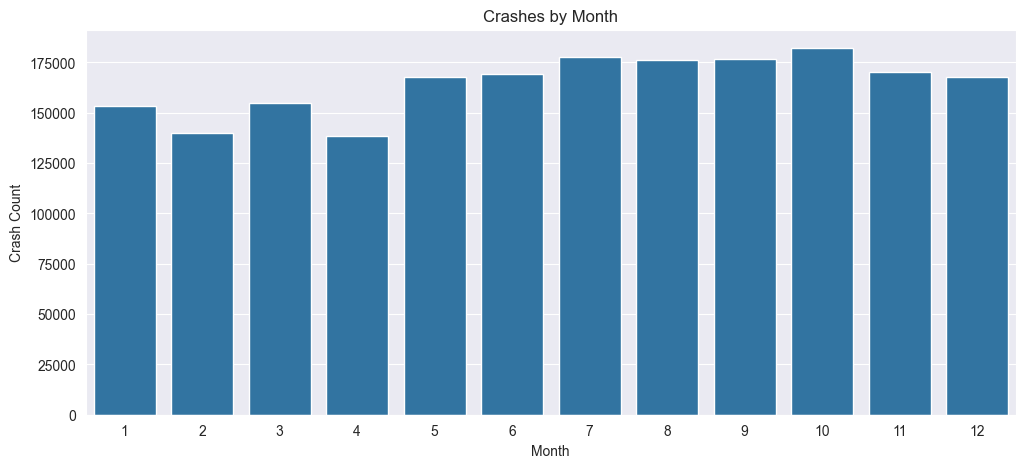

In [19]:
#Crashes by Month
plt.figure(figsize=(12,5))
sns.countplot(x="CRASH_MONTH", data=df)
plt.title("Crashes by Month")
plt.xlabel("Month")
plt.ylabel("Crash Count")
plt.show()


### Insight
Crash frequency varies across months, with higher incidents occurring during warmer periods.

### Interpretation
Weather and seasonal travel patterns appear to influence crash rates.


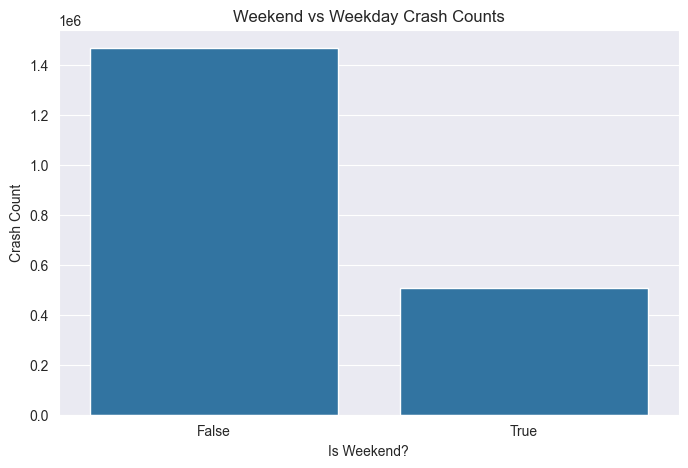

In [20]:
#Weekend vs Weekday
plt.figure(figsize=(8,5))
sns.countplot(x="IS_WEEKEND", data=df)
plt.title("Weekend vs Weekday Crash Counts")
plt.xlabel("Is Weekend?")
plt.ylabel("Crash Count")
plt.show()


### Insight
Weekdays consistently show more crashes than weekends.

### Interpretation
This reinforces the relationship between commuter traffic patterns and collision frequency.


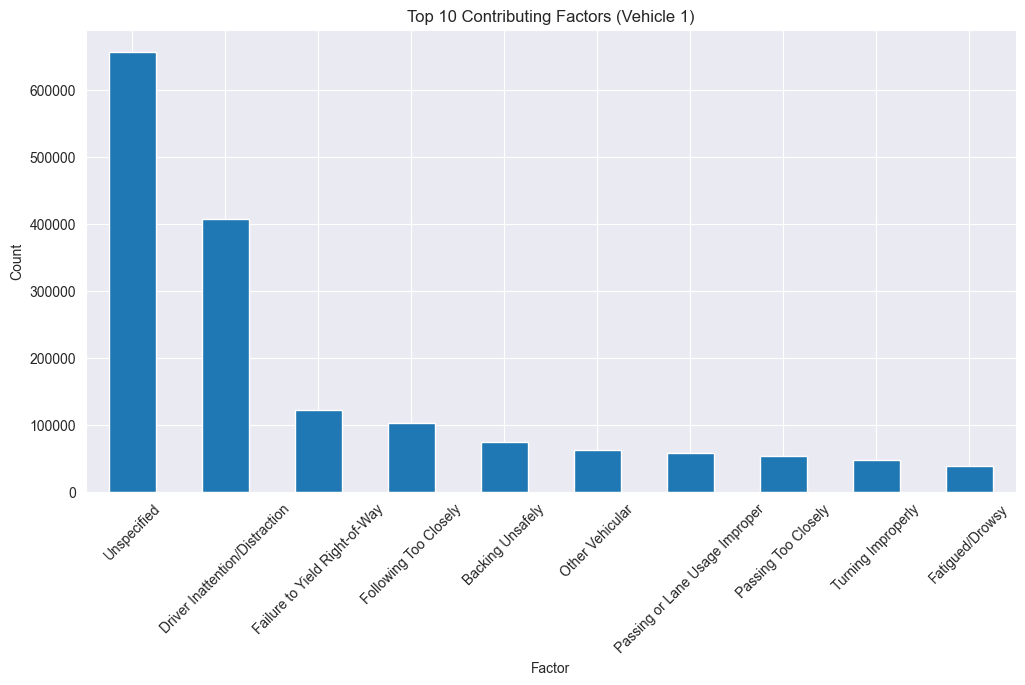

In [21]:
#Top 10 Contributing Factors (Vehicle 1)
plt.figure(figsize=(12,6))
df["CONTRIBUTING_FACTOR_VEHICLE_1"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Contributing Factors (Vehicle 1)")
plt.xlabel("Factor")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### Insight
Driver-related factors such as distraction and following too closely appear most frequently.

### Interpretation
Human behavior is the leading contributor to collision events.


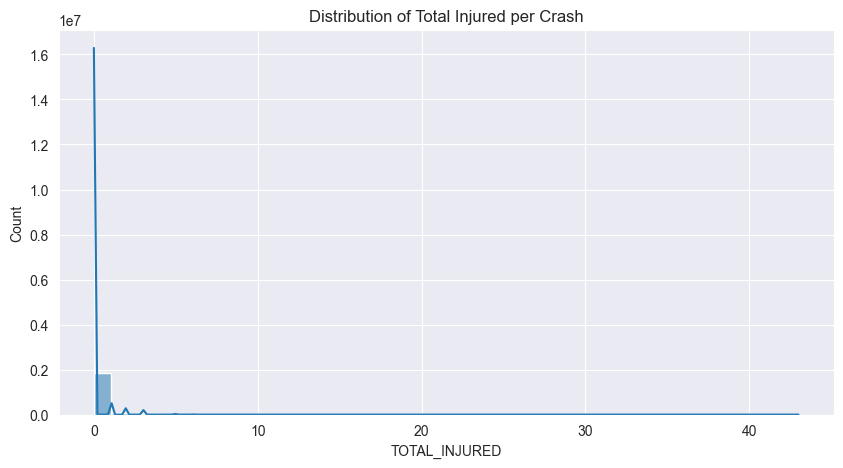

In [22]:
#Distribution of Injuries per Crash
plt.figure(figsize=(10,5))
sns.histplot(df["TOTAL_INJURED"], bins=40, kde=True)
plt.title("Distribution of Total Injured per Crash")
plt.show()


### Insight
Most crashes involve very few injuries, while a minority involve several injuries.

### Interpretation
This highlights the distribution between common minor incidents and rarer severe events.


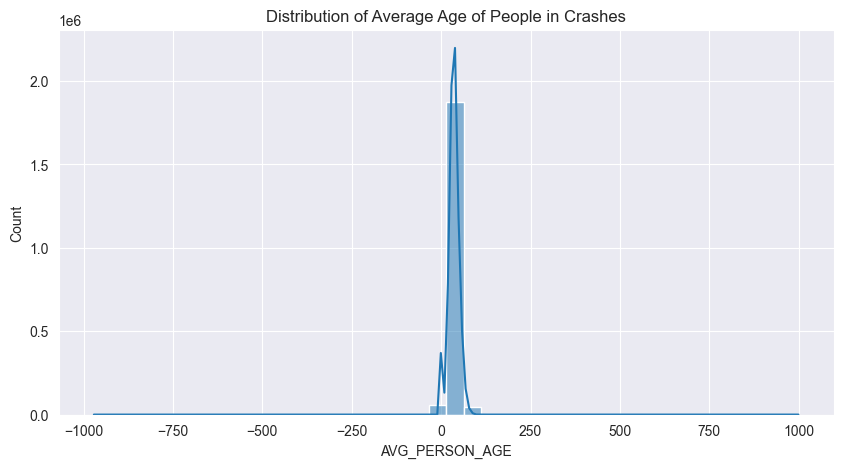

In [23]:
#Distribution of Average Age of People in Crashes
plt.figure(figsize=(10,5))
sns.histplot(df["AVG_PERSON_AGE"], bins=40, kde=True)
plt.title("Distribution of Average Age of People in Crashes")
plt.show()


### Insight
The average age per crash is centered around adults in their 30s and 40s.

### Interpretation
This distribution aligns with the age range of typical active drivers and passengers.


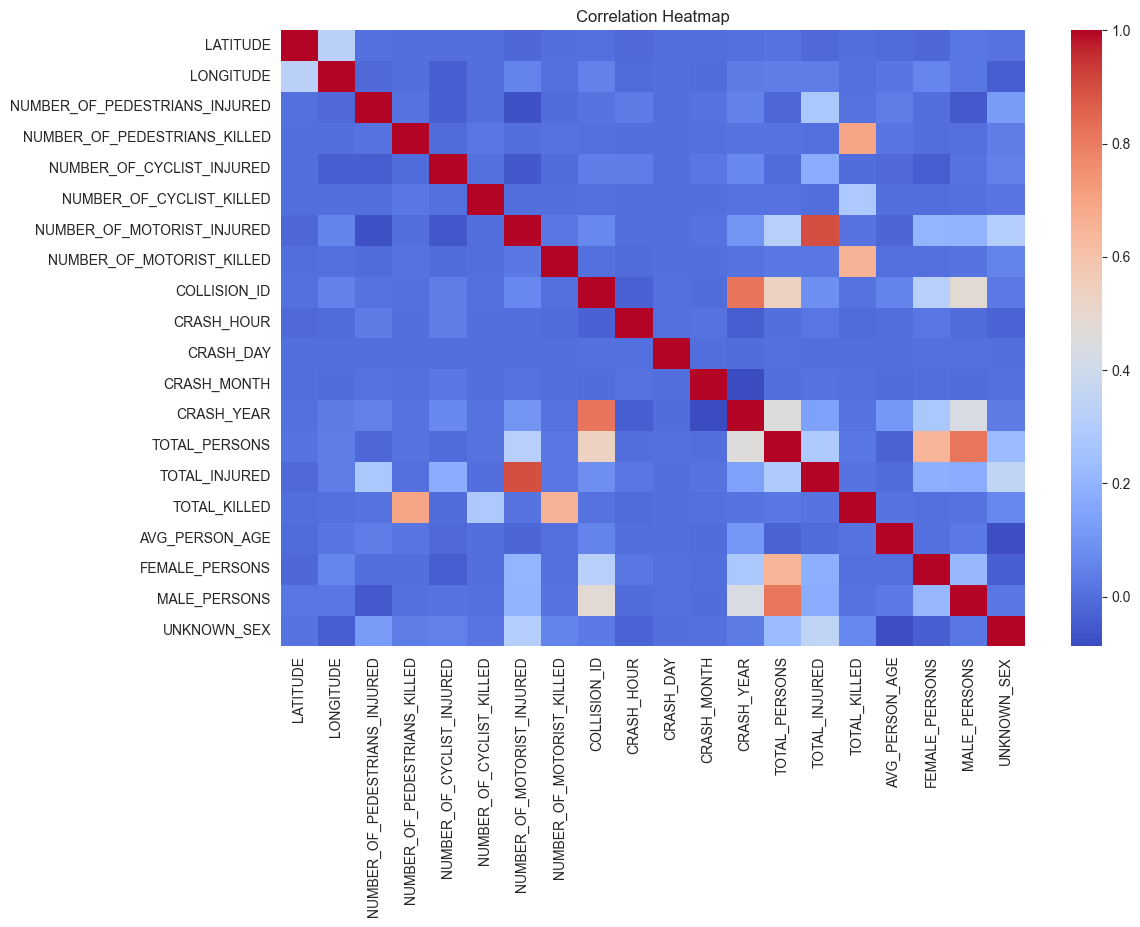

In [24]:
#Correlation Heatmap
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Insight
There are weak correlations among most numerical variables, with slightly stronger relationships among injury-related fields.

### Interpretation
This indicates that crash severity is influenced more by categorical factors (behavior, location) than by numerical variables.
